In [2]:
import requests
import pandas as pd
import os
page = requests.get("https://www.worldometers.info/coronavirus")

In [3]:
url = 'https://www.worldometers.info/coronavirus'

In [4]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 73,762,294 Cases and 1,640,134 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<lin
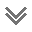

In [5]:
page.content

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 73,762,294 Cases and 1,640,134 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x5
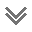

In [8]:
print(soup.prettify())

In [9]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [10]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_co

In [12]:
rows = table.find_all("tr", attrs={"style": ""})

In [13]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:15])
        
    else:
        data.append(item.text.strip().split("\n")[:15])

In [14]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop'],
 ['World',
  '73,762,294',
  '+558,812',
  '1,640,134',
  '+12,139',
  '51,781,517',
  '+461,249',
  '20,340,643',
  '117,181',
  '9,463',
  '210.4',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '17,118,918',
  '+175,014',
  '310,649 ',
  '+2,552',
  '9,988,981',
  '+115,857',
  '6,819,288',
  '27,868',
  '51,580',
  '936',
  '224,727,423',
  '677,111',
  '331,891,557 '],
 ['2',
  'India',
  '9,932,908',
  '+26,401',
  '144,130 ',
  '+384',
  '9,455,793',
  '+33,961',
  '332,985',
  '8,944',
  '7,166',
  '104',
  '155,560,655',
  '112,221',
  '1,386,197,276 '],
 ['3',
  'Brazil',
  '6,974,258',
  '+44,849',
  '182,854 ',
  '+909',
  '6,067,862',
  '+51,777',
  '723,542',
  '8,318',
  '32,705',
  '857',
  '25,700,000',
  '120,515',
  '213,2

In [17]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df = pd.DataFrame(data[1:], columns=data[0][:15]) #Formatting the header

In [18]:
df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    73,762,294    +558,812  1,640,134     +12,139  51,781,517   
1      1           USA  17,118,918   +175,014    310,649       +2,552   
2      2         India   9,932,908    +26,401    144,130         +384   
3      3        Brazil   6,974,258    +44,849    182,854         +909   
4      4        Russia   2,707,945    +26,689     47,968         +577   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +461,249   20,340,643     117,181            9,463            210.4   
1      9,988,981     +115,857   6,819,288           27,868           51,580   
2      9,455,793      +33,961     332,985            8,944            7,166   
3      6,067,862      +51,777     723,542            8,318           32,705   
4      2,149,610      +24,813     510,367            2,300           18,552   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           936  224,727,423  677,111    331,891,557   
2           104  155,560,655  112,221  1,386,197,276   
3           857   25,700,000  120,515    213,250,674   
4           329   83,439,508  571,647    145,963,245

In [19]:
world_data_df = df
world_data_df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    73,762,294    +558,812  1,640,134     +12,139  51,781,517   
1      1           USA  17,118,918   +175,014    310,649       +2,552   
2      2         India   9,932,908    +26,401    144,130         +384   
3      3        Brazil   6,974,258    +44,849    182,854         +909   
4      4        Russia   2,707,945    +26,689     47,968         +577   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +461,249   20,340,643     117,181            9,463            210.4   
1      9,988,981     +115,857   6,819,288           27,868           51,580   
2      9,455,793      +33,961     332,985            8,944            7,166   
3      6,067,862      +51,777     723,542            8,318           32,705   
4      2,149,610      +24,813     510,367            2,300           18,552   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           936  224,727,423  677,111    331,891,557   
2           104  155,560,655  112,221  1,386,197,276   
3           857   25,700,000  120,515    213,250,674   
4           329   83,439,508  571,647    145,963,245

In [20]:
world_data_1_df = world_data_df.drop(columns = {'NewCases', 'NewDeaths', 'NewRecovered', 'Serious,Critical', 'Deaths/1M pop', 'Tests/', 'Tot\xa0Cases/1M pop'})
world_data_1_df.head()

# Country,Other  TotalCases TotalDeaths TotalRecovered ActiveCases  \
0  World    73,762,294    +558,812     +12,139       +461,249     117,181   
1      1           USA  17,118,918    310,649       9,988,981   6,819,288   
2      2         India   9,932,908    144,130       9,455,793     332,985   
3      3        Brazil   6,974,258    182,854       6,067,862     723,542   
4      4        Russia   2,707,945     47,968       2,149,610     510,367   

    TotalTests          1M pop  
0                          All  
1  224,727,423    331,891,557   
2  155,560,655  1,386,197,276   
3   25,700,000    213,250,674   
4   83,439,508    145,963,245

In [21]:
world_data_2_df = world_data_1_df.rename(
    columns= {"#": "id",
              "Country,Other":"Country.Country",
              "TotalCases":"Total_Cases",
              "TotalDeaths":"Total_Deaths",
              "TotalRecovered":"Total_Recovered",
              "ActiveCases":"Active_Cases",
              "TotalTests":"Total_Tests",
              "1M pop":"Population"
             })
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      73,762,294    +558,812      +12,139        +461,249   
1      1             USA  17,118,918     310,649        9,988,981   
2      2           India   9,932,908     144,130        9,455,793   
3      3          Brazil   6,974,258     182,854        6,067,862   
4      4          Russia   2,707,945      47,968        2,149,610   

  Active_Cases  Total_Tests      Population  
0      117,181                          All  
1    6,819,288  224,727,423    331,891,557   
2      332,985  155,560,655  1,386,197,276   
3      723,542   25,700,000    213,250,674   
4      510,367   83,439,508    145,963,245

In [22]:
world_data_2_df.dtypes

id                 object
Country.Country    object
Total_Cases        object
Total_Deaths       object
Total_Recovered    object
Active_Cases       object
Total_Tests        object
Population         object
dtype: object

In [23]:
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      73,762,294    +558,812      +12,139        +461,249   
1      1             USA  17,118,918     310,649        9,988,981   
2      2           India   9,932,908     144,130        9,455,793   
3      3          Brazil   6,974,258     182,854        6,067,862   
4      4          Russia   2,707,945      47,968        2,149,610   

  Active_Cases  Total_Tests      Population  
0      117,181                          All  
1    6,819,288  224,727,423    331,891,557   
2      332,985  155,560,655  1,386,197,276   
3      723,542   25,700,000    213,250,674   
4      510,367   83,439,508    145,963,245

In [25]:
cols = ['id', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Total_Tests', 'Population']
world_data_2_df[cols] = world_data_2_df[cols].replace({'\$': '', ',': ''}, regex=True)

In [26]:
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      73,762,294     +558812       +12139         +461249   
1      1             USA    17118918      310649          9988981   
2      2           India     9932908      144130          9455793   
3      3          Brazil     6974258      182854          6067862   
4      4          Russia     2707945       47968          2149610   

  Active_Cases Total_Tests   Population  
0       117181                      All  
1      6819288   224727423   331891557   
2       332985   155560655  1386197276   
3       723542    25700000   213250674   
4       510367    83439508   145963245

In [28]:
world_data_3_df = world_data_2_df.drop(world_data_2_df.index[0])

In [29]:
world_data_3_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
1  1             USA    17118918      310649          9988981      6819288   
2  2           India     9932908      144130          9455793       332985   
3  3          Brazil     6974258      182854          6067862       723542   
4  4          Russia     2707945       47968          2149610       510367   
5  5          France     2391447       59072           179087      2153288   

  Total_Tests   Population  
1   224727423   331891557   
2   155560655  1386197276   
3    25700000   213250674   
4    83439508   145963245   
5    29323706    65339853

In [40]:
world_data_3_df['id'] = pd.to_numeric(world_data_3_df['id'], errors='coerce').astype('Int64')
world_data_3_df['Total_Cases'] = pd.to_numeric(world_data_3_df['Total_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Deaths'] = pd.to_numeric(world_data_3_df['Total_Deaths'], errors='coerce').astype('Int64')
world_data_3_df['Total_Recovered'] = pd.to_numeric(world_data_3_df['Total_Recovered'], errors='coerce').astype('Int64')
world_data_3_df['Active_Cases'] = pd.to_numeric(world_data_3_df['Active_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Tests'] = pd.to_numeric(world_data_3_df['Total_Tests'], errors='coerce').astype('Int64')
world_data_3_df['Population'] = pd.to_numeric(world_data_3_df['Population'], errors='coerce').astype('Int64')

In [41]:
world_data_3_df.head()

id Country.Country  Total_Cases  Total_Deaths  Total_Recovered  \
1   1             USA     17118918        310649          9988981   
2   2           India      9932908        144130          9455793   
3   3          Brazil      6974258        182854          6067862   
4   4          Russia      2707945         47968          2149610   
5   5          France      2391447         59072           179087   

   Active_Cases  Total_Tests  Population  
1       6819288    224727423   331891557  
2        332985    155560655  1386197276  
3        723542     25700000   213250674  
4        510367     83439508   145963245  
5       2153288     29323706    65339853

In [42]:
world_data_3_df.dtypes

id                  Int64
Country.Country    object
Total_Cases         Int64
Total_Deaths        Int64
Total_Recovered     Int64
Active_Cases        Int64
Total_Tests         Int64
Population          Int64
dtype: object

In [43]:
world_data_3_df.head()

id Country.Country  Total_Cases  Total_Deaths  Total_Recovered  \
1   1             USA     17118918        310649          9988981   
2   2           India      9932908        144130          9455793   
3   3          Brazil      6974258        182854          6067862   
4   4          Russia      2707945         47968          2149610   
5   5          France      2391447         59072           179087   

   Active_Cases  Total_Tests  Population  
1       6819288    224727423   331891557  
2        332985    155560655  1386197276  
3        723542     25700000   213250674  
4        510367     83439508   145963245  
5       2153288     29323706    65339853